<h1>Brandon Owen's Machine Learning Adventure</h1>
<p>An exciting look into the power of machine learning models</p>

#### Importing the necessary frameworks:

In [1]:
import datetime
import numpy as np
import pandas as pd
import ipywidgets as widgets

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'ipywidgets'

<br>
<h4>Reading the csv data from the stock price dataset:</h4>

In [2]:
url = "https://github.com/galaxyrider11/StockDataset/blob/main/HistoricalData.csv?raw=true"
df = pd.read_csv(url, sep=',', on_bad_lines='warn', encoding='utf-8')

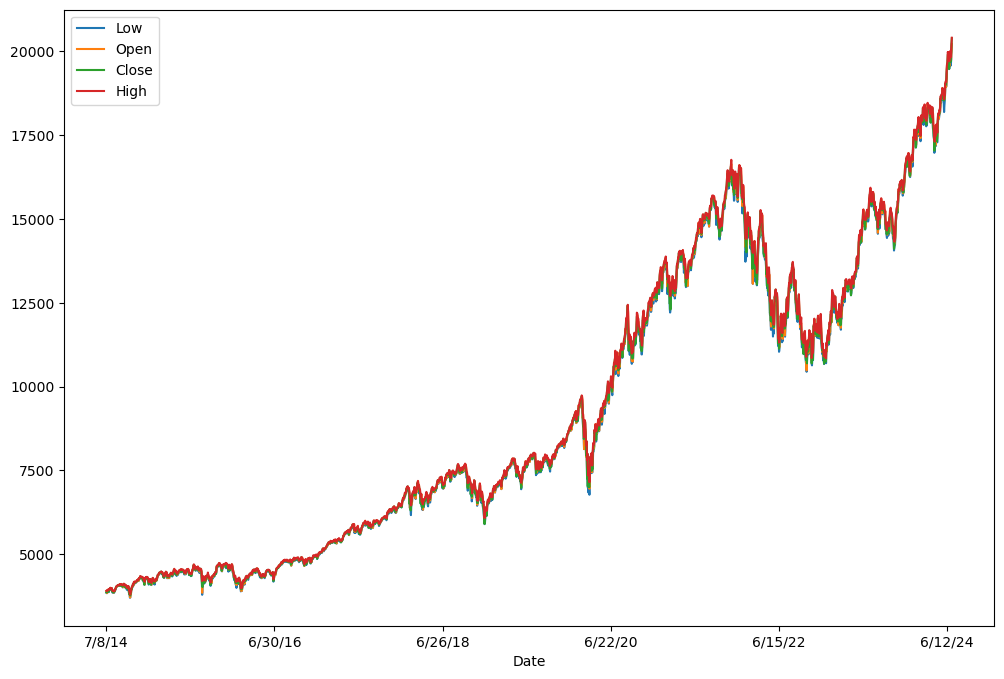

In [3]:
df.plot(x="Date", y=["Low", "Open", "Close", "High"], figsize=(12,8))
plt.show()

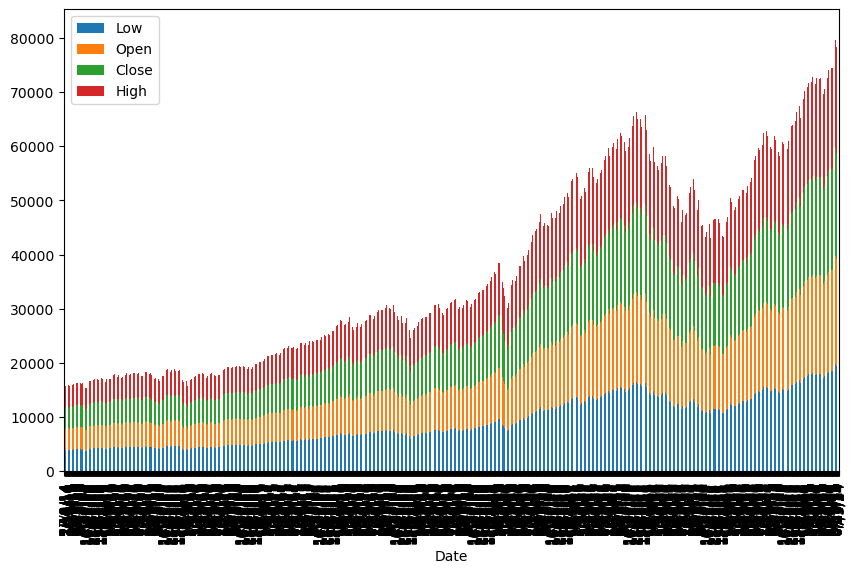

In [9]:
df.plot.bar(x="Date", y=["Low", "Open", "Close", "High"], figsize=(10,6), stacked=True)
plt.gcf().tight_layout()
plt.show()

<br>
<h4>Creating and training the model:</h4>

In [11]:
# Convert day names to numerical values
features = pd.get_dummies(df)

# Value we want to predict
label = np.array(features['High'])

# Remove that column from the rest of the data
features = features.drop(['High'], axis=1)

# Save feature names
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

train_features, test_features, train_labels, test_labels = (
    train_test_split(features, label, test_size=0.5, random_state=42))

# Create the actual model now with 1000 decision trees
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(train_features, train_labels)

# Use the trained model to predict the other half of the dataset
predictions = model.predict(test_features)

<br>
<h4>Calculating MAE, MAPE, MSE, RMSE, and R2:</h4>

In [13]:
# Calculate the MAE
mae = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(mae), 2), 'degrees.')

# Calculate the MAPE
mape = 100 * (mae / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Mean Absolute Percentage Error:', round(accuracy, 2), '%.')

# Calculate the MSE and RMSE
mse = mean_squared_error(test_labels, predictions)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', mse**0.5)

# Calculate the R2 Score
r2 = r2_score(test_labels, predictions)
print(f'R-Squared: {r2}')

Mean Absolute Error: 36.36 degrees.
Mean Absolute Percentage Error: 99.62 %.
Mean Squared Error: 3480.1800283300504
Root Mean Squared Error: 58.993050678279474
R-Squared: 0.999814540556806


Variable: Open                 Importance: 0.51
Variable: Close                Importance: 0.29
Variable: Low                  Importance: 0.2
Variable: Year                 Importance: 0.0
Variable: Month                Importance: 0.0
Variable: Day_Number           Importance: 0.0
Variable: Date_1/10/17         Importance: 0.0
Variable: Date_1/10/18         Importance: 0.0
Variable: Date_1/10/19         Importance: 0.0
Variable: Date_1/10/20         Importance: 0.0
Variable: Date_1/10/22         Importance: 0.0
Variable: Date_1/10/23         Importance: 0.0
Variable: Date_1/10/24         Importance: 0.0
Variable: Date_1/11/16         Importance: 0.0
Variable: Date_1/11/17         Importance: 0.0
Variable: Date_1/11/18         Importance: 0.0
Variable: Date_1/11/19         Importance: 0.0
Variable: Date_1/11/21         Importance: 0.0
Variable: Date_1/11/22         Importance: 0.0
Variable: Date_1/11/23         Importance: 0.0
Variable: Date_1/11/24         Importance: 0.0
Variable: D

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

<p>The main benefit of adding this feature is to show which columns have the most effect on the predicted value. It turns out that the stock market doesn't depend on any certain day of the week, and can be predicted entirely with Open, Low, and Close values.</p>

<br>
<h4>Stock price fluctation through the years:</h4>

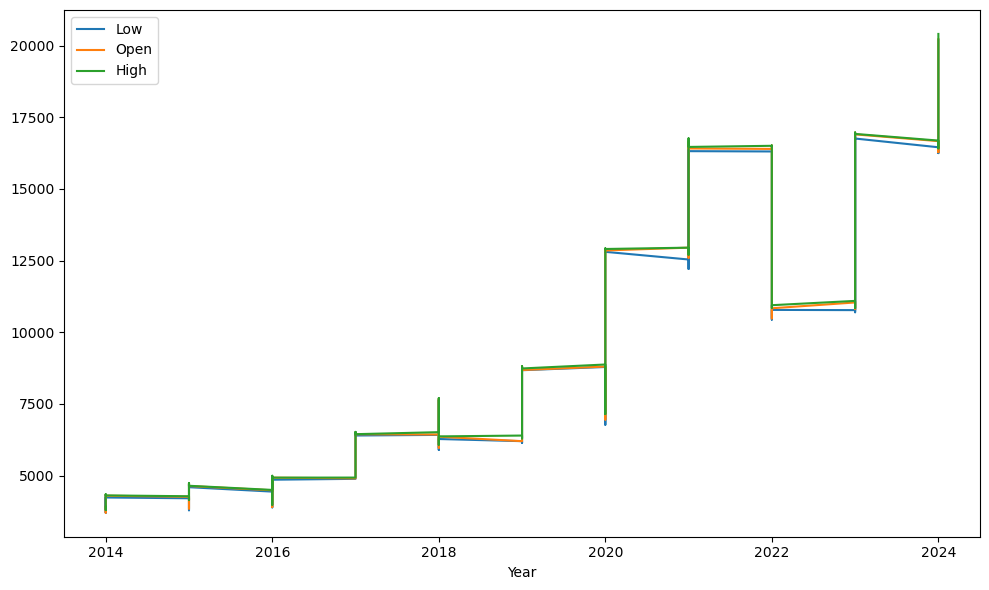

In [18]:
# Set X and Y values
df.plot(x="Year", y=["Low", "Open", "High"], figsize=(10,6))
# Display the graph
plt.gcf().tight_layout()
plt.show()

<p>This is just a siple graph to show the vaariations in stock prices throughout the years. This graph is particularly useful because it shows the range for each year, and the line between years showing the trend from year to year. Overall, Low and Open values were fairly close to the High value each day.</p>

<br>
<h4>Comparing actual values to predicted values:</h4>

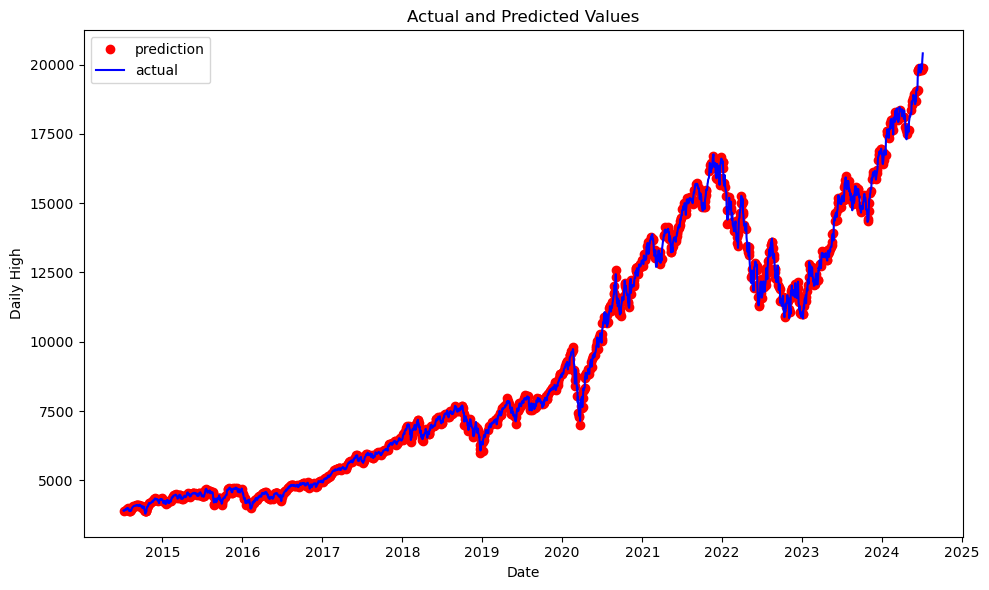

In [20]:
# Dates of training values
months = features[:, feature_list.index('Month')]
days = features[:, feature_list.index('Day_Number')]
years = features[:, feature_list.index('Year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data={'date': dates, 'actual': label})
# Dates of predictions
months_test = test_features[:, feature_list.index('Month')]
days_test = test_features[:, feature_list.index('Day_Number')]
years_test = test_features[:, feature_list.index('Year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' +
              str(int(day)) for year, month, day in zip(years_test, months_test, days_test)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data={'date': test_dates, 'prediction': predictions})
# Change the graph width
plt.figure(figsize=(10,6))
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label='prediction')
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label='actual')
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Daily High'); plt.title('Actual and Predicted Values');
# Display the graph
plt.gcf().tight_layout()
plt.show()

<p>Splitting the data in half, and then comparing predictions to the other half allows for very accurate predictions. As seen in this graph, the model is able to predict the High value of the NASDAQ with incredible precision.</p>

In [36]:
widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider(value=7, continuous_update=False, description='Test:', max=10)